#Práctico 1: Análisis y Visualización

Importar las librerías a utilizar a lo largo del análisis.

Leer el dataset, que está guardado en la memoria de la compu con formato csv. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Definimos algunas funciones que vamos a usar

def to_categorical(column, bin_size=10, min_cut=15, max_cut=65):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in np.arange(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [ ]:
# Opción para ver todas las columnas del dataset en el notebook
pd.set_option('display.max_columns', 50)

In [ ]:
url = "https://raw.githubusercontent.com/AgusCarchano/Mentorias-grupo1/master/data/bank-additional-full.csv"
df = pd.read_csv(url, sep=";")

## Análisis de distribuciones simples de algunas variables

### Variable Y

Tasa de éxito en la campaña= 11.27 %


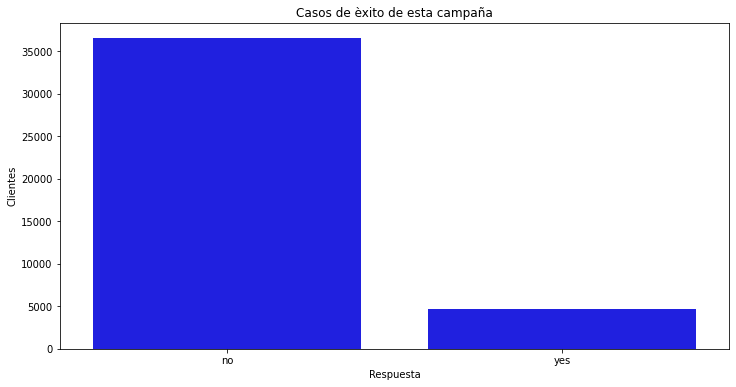

In [ ]:
#La variable principal es y, que representa si la persona contrató o no el PF durante la campaña de marketing.
plt.figure(figsize = (12,6))
sns.countplot(data=df,x="y", color='blue')
plt.title("Casos de èxito de esta campaña")
plt.xlabel("Respuesta")
plt.ylabel("Clientes")

tasa = len(df[df.y=="yes"])/len(df)*100
print("Tasa de éxito en la campaña=", f'{tasa:3.2f}' , "%")

### Edad

In [ ]:
df['age_group'] = to_categorical(df.age,bin_size=10, min_cut=15, max_cut=65)

Text(0, 0.5, '')

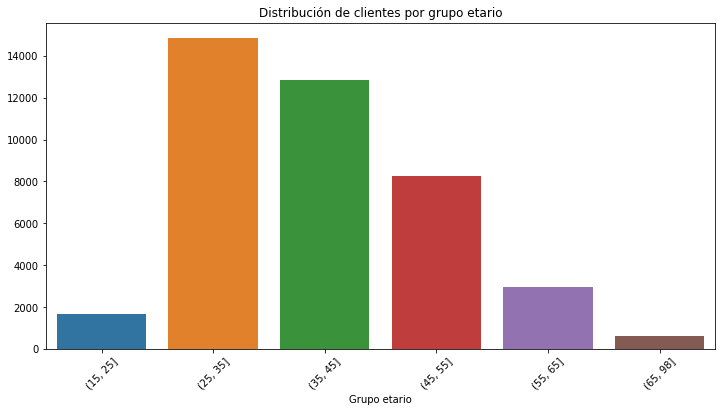

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="age_group")
plt.xticks(rotation=45)
plt.title("Distribución de clientes por grupo etario")
plt.xlabel("Grupo etario")
plt.ylabel("")

### Empleo

Agrupamos los clientes según tipo de empleo. "Sin ingreso propio" hace referencia a clientes que no cobran un salario fijo por su ocupación o son desempleados. "Ingreso por Cuenta Propia o Directivo" engloba a emprendedores, cuentapropistas, retirados y directivos. El resto de las clases son traducciones de la variable en ingles

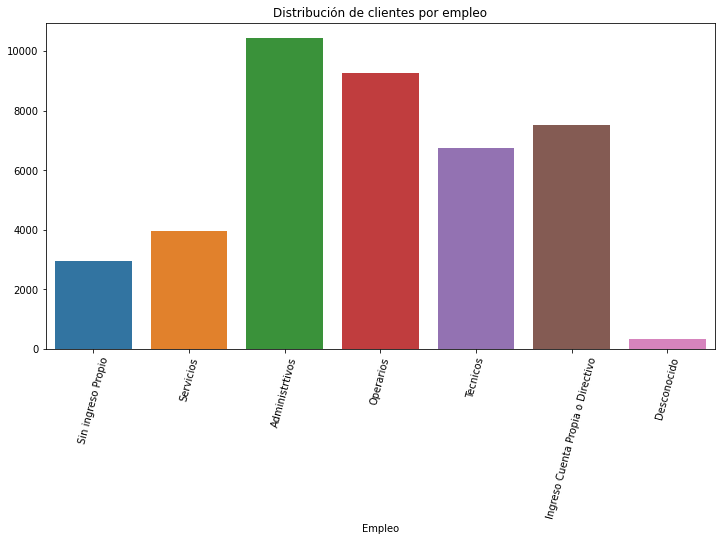

In [ ]:
df['job_groups'] = df['job'].map({'unknown': 'Desconocido',
                                  'housemaid': 'Sin ingreso Propio',
                                  'student': 'Sin ingreso Propio',
                                  'unemployed': 'Sin ingreso Propio',
                                  'services': 'Servicios',
                                  'admin.': 'Administrtivos',
                                  'retired': 'Ingreso Cuenta Propia o Directivo',
                                  'self-employed': 'Ingreso Cuenta Propia o Directivo',
                                  'entrepreneur': 'Ingreso Cuenta Propia o Directivo',
                                  'management': 'Ingreso Cuenta Propia o Directivo',
                                  'technician': 'Tecnicos',
                                  'blue-collar': 'Operarios' }
                                            )
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="job_groups")
plt.title("Distribución de clientes por empleo")
plt.xticks(rotation=75)
plt.ylabel("")
plt.xlabel("Empleo")
plt.show()

### Estado civil

Analizamos la distribución de los clientes según su estado civil.





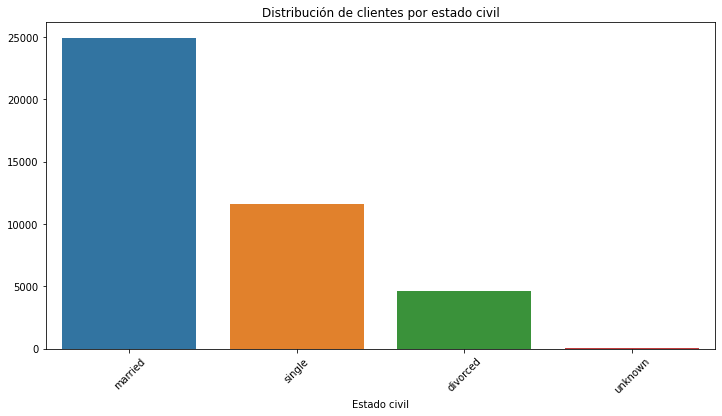

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Distribución de clientes por estado civil")
sns.countplot(data=df, x="marital")     
plt.xticks(rotation=45)
plt.ylabel("")
plt.xlabel("Estado civil")
plt.show()

### Nivel educativo

Para la variable educación, hacemos un agrupamiento previo y vemos como se distribuye

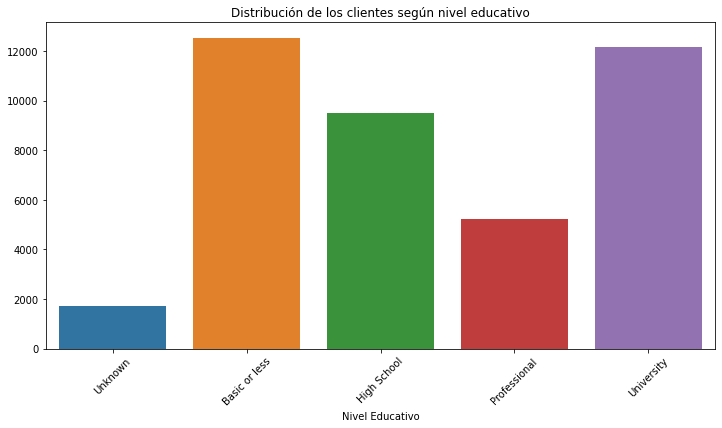

In [ ]:
#reagrupar la variable educación
df['education_groups'] = df['education'].map({'unknown': 'Unknown',
                                             'illiterate': 'Basic or less',
                                              'basic.4y': 'Basic or less',
                                               'basic.6y': 'Basic or less',
                                                'basic.9y': 'Basic or less',
                                                  'high.school': 'High School',
                                                   'professional.course': 'Professional',
                                                    'university.degree': 'University'}
                                            )

plt.figure(figsize=(12,6))
order = ['Unknown', 'Basic or less', 'High School', 'Professional', 'University']
sns.countplot(data=df, x="education_groups",order=order)     
plt.title("Distribución de los clientes según nivel educativo")
plt.xticks(rotation=45)
plt.ylabel("")
plt.xlabel("Nivel Educativo")
plt.show()

### Situación crediticia

Vemos la situacion crediticia de los clientes, según tienen créditos en default, créditos hipotecarios o créditos personales

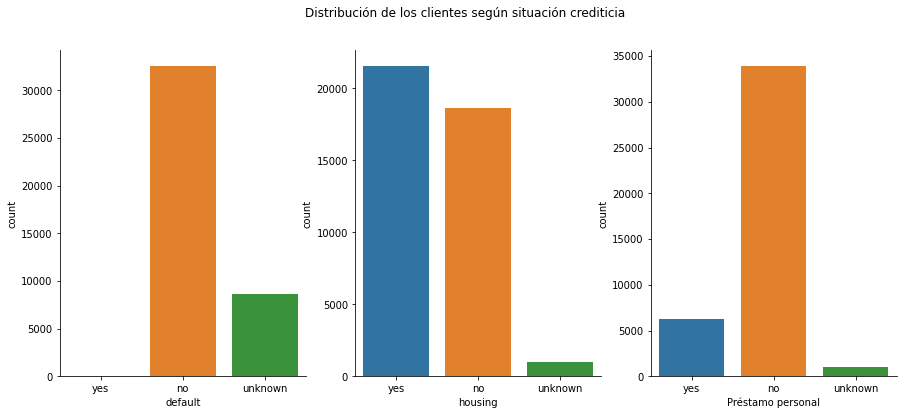

Clientes que tienen créditos en default= 0.01 %
Clientes que tienen créditos hipotecarios= 52.38 %
Clientes que tienen créditos personales= 15.17 %


In [ ]:
order_credit=["yes","no","unknown"]
f, axs = plt.subplots(ncols=3, figsize=(15,6))
plt.suptitle("Distribución de los clientes según situación crediticia")
sns.countplot(data=df, x='default', order=order_credit, ax=axs[0])
plt.xlabel("Préstamos en default")
sns.countplot(data=df, x='housing', order=order_credit, ax=axs[1])
plt.xlabel("Crédito hipotecario")
sns.countplot(data=df, x='loan', order=order_credit, ax=axs[2])
plt.xlabel("Préstamo personal")
sns.despine()
plt.show()



print("Clientes que tienen créditos en default=", round(len(df[df.default=="yes"])/len(df)*100,2), "%")
print("Clientes que tienen créditos hipotecarios=", round(len(df[df.housing=="yes"])/len(df)*100,2), "%")
print("Clientes que tienen créditos personales=", round(len(df[df.loan=="yes"])/len(df)*100,2), "%")


### Contacto

Vemos la cantidad de clientes según la forma de contacto. En este caso, solo se los contacto mediante teléfono o celular.

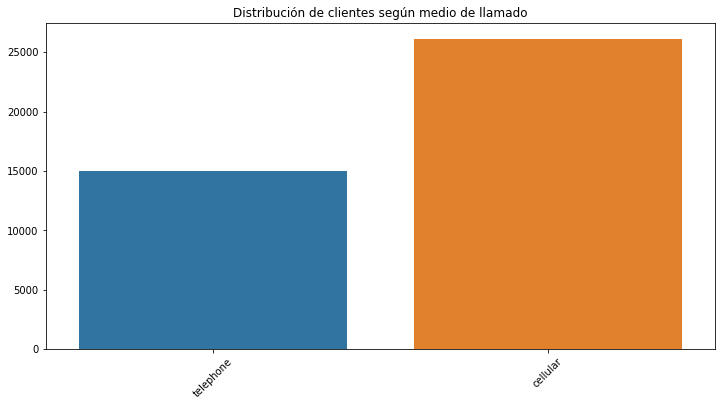

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="contact")
plt.xticks(rotation=45)
plt.title("Distribución de clientes según medio de llamado")
plt.xlabel("")
plt.ylabel("")
plt.show()

### Duración de la llamada

Se analiza la duración de la llamada con un boxplot y un gráfico de densidad.

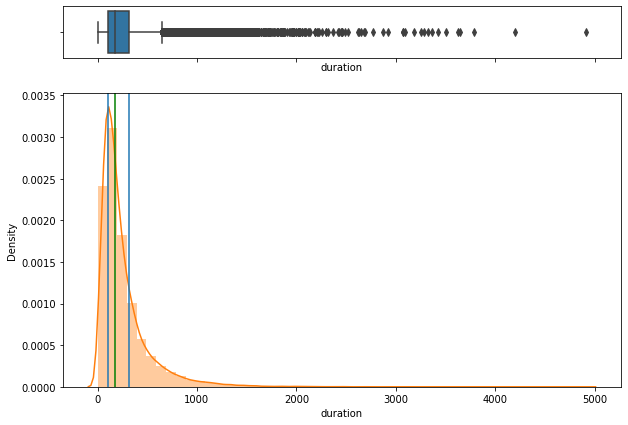

Duración promedio= 4.304750169952413  minutos
Duración Máxima= 81.96666666666667  minutos
Duración Máxima= 4918  segundos
Duración Mínima= 0  segundos


In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.duration, ax=ax_box)
sns.distplot(df.duration, ax=ax_hist, kde=False, hist=False)
sns.distplot(df.duration, ax=ax_hist, kde=True, hist=True,norm_hist=False)
plt.axvline(df.duration.quantile(0.25))
plt.axvline(df.duration.quantile(0.50),color='g')
plt.axvline(df.duration.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
plt.show()


print("Duración promedio=", df.duration.mean()/60, " minutos")
print("Duración Máxima=", df.duration.max()/60, " minutos")
print("Duración Máxima=", df.duration.max(), " segundos")
print("Duración Mínima=", df.duration.min(), " segundos")

### Campaign

Analizamos con un boxplot la variable "campaign" que representa las veces que ha sido contactada la persona durante esta camapaña.

In [ ]:
print("Estadística descriptiva para la variable Campaign")
df.campaign.describe().apply(lambda s: '{0:.2f}'.format(s)) 

Estadística descriptiva para la variable Campaign


count    41188.00
mean         2.57
std          2.77
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         56.00
Name: campaign, dtype: object

Percentil 97.5:  10.0


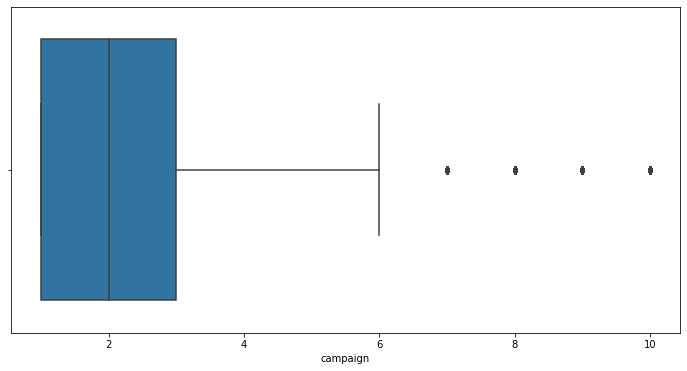

In [ ]:
#Hacemos el boxplot filtrando por x<= 10
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['campaign']<=10],x="campaign")
print("Percentil 97.5: ",df.campaign.quantile(.975))

El 75% de las observaciones se concentra en hasta 3 llamados en la campaña en curso. Hay algunos valores extremos, pero si tomamos el percentil 97.5% el máximo el de 10 llamados.

### Pdays

La variable "pdays" representa la cantidad de dias transcurridos desde el último contacto. Realizamos un histograma para analizar su distribución.

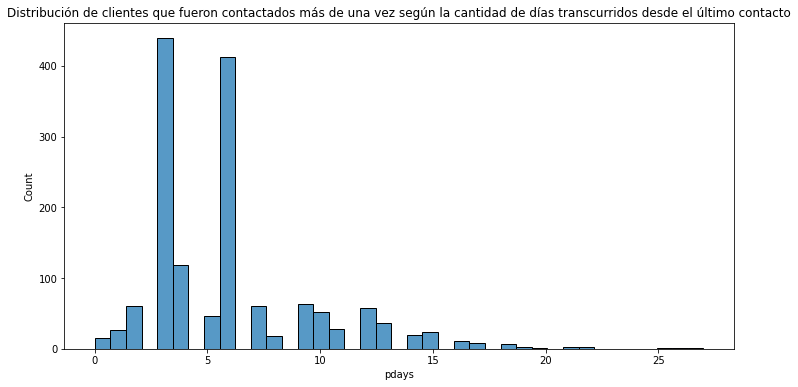

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Distribución de clientes que fueron contactados más de una vez según la cantidad de días transcurridos desde el último contacto")
sns.histplot(data=df[df.pdays<900],x="pdays")
plt.show()

La vamos a agrupar para análisis posteriores

In [ ]:
df['pdays_group'] = to_categorical(df.pdays[df.pdays !=999], bin_size = 5, min_cut = 0, max_cut = 30)

## Correlaciones entre las variables

In [ ]:
df['y_'] = df['y'].map({"yes":1,"no":0,"unknown":np.nan})
df['default_num'] = df['default'].map({"yes":1,"no":0,"unknown":np.nan})
df['housing_num'] = df['housing'].map({"yes":1,"no":0,"unknown":np.nan})
df['loan_num'] = df['loan'].map({"yes":1,"no":0,"unknown":np.nan})

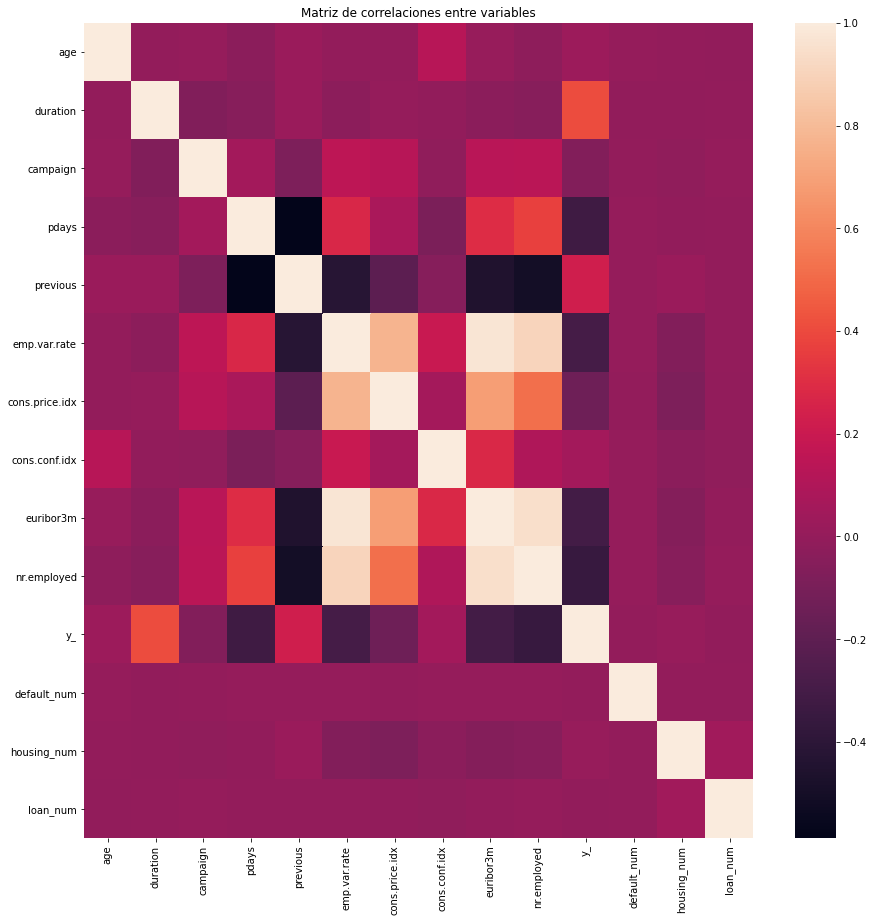

In [ ]:
plt.figure(figsize = (15,15))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = False)
plt.title("Matriz de correlaciones entre variables")  
plt.show()

Se advierte la presencia de una alta correlación positiva entre:
- la tasa de interés y la cantidad de empleados, 
- la tasa de intnerés y la tasa de variación del empleo, 
- y lógicamente, también entre la cantidad de empleados y la tasa de variación del empleo.

- el índice de precios al consumidor y la variación en la tasa de empleo.
- la tasa de interés y el índice de precios al consumidor.
- el índice de precios al consumidor y la cantidad de empleados.

En cuanto a la variable objetivo, la misma presenta una correlación negativa con:
- la tasa de interés (mientras más alta sea, menos se contrata PF)
- la tasa de variación del empleo
- la cantidad de empleados
- la cantidad de días que pasaron desde que fue contactado por una campaña previa (para los casos en que fue contactado hace más tiempo, o no fue contactado directamente, mas se contrata PF)
Y una correlación positiva con:
- la duración de la llamada

## Análisis de distribuciones conjuntas de las variables

#### Poutcome vs previous

Analizamos la variable de contactos previos y el resultado en la camapaña anterior.

Porcentaje de clientes que habían sido contactados previamente:  13.65689035641449 %


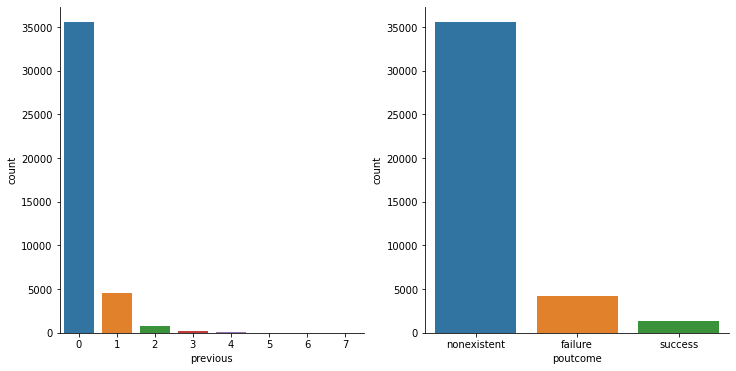

In [ ]:
#variables sobre cantidad de contactos
f, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=df, x='previous', ax=axs[0])
sns.countplot(data=df, x='poutcome', ax=axs[1])
sns.despine()
print("Porcentaje de clientes que habían sido contactados previamente: ",
      len(df[df.previous!=0])/len(df)*100,"%")


Ahora vemos como fue el resultado para las personas que fueron contactados previamente.

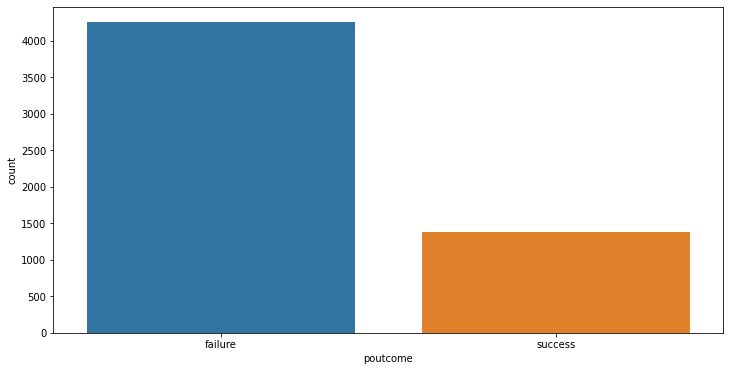

Cantidad de clientes contactados en campañas previas:  5625
Tasa de éxito en campañas previas= 24.41 %
Tasa de éxito de la campaña actual sobre el sub-grupo 
 de clientes contactados en campañas previas= 26.65 %


In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=mask, x='poutcome')
plt.show()

mask=df[df.previous!=0]
exitos=df[df.poutcome=="success"]
print("Cantidad de clientes contactados en campañas previas: ", len(mask))
print("Tasa de éxito en campañas previas=", round(len(exitos)/len(mask)*100,2), "%")


exitos_actual = mask[mask.y == 'yes']
print("Tasa de éxito de la campaña actual sobre el sub-grupo \n de clientes contactados en campañas previas=", round(len(exitos_actual)/len(mask)*100,2), "%")


Tomando el grupo de 5625 personas que habian sido contactadas en campañas anteriores, la tasa de éxito de la campaña actual es muy similar a la tasa de las campañas previas.

In [ ]:
df_exitos_actual = exitos_actual[exitos_actual.poutcome == 'failure']


print(f'Clientes contactados previamente que contrataron el servicio en esa campaña: {len(exitos)}')
print(f'Clientes contactados previamente que contrataron el servicio en esta campaña: {len(exitos_actual)}')

print('Numero de clientes que contrataron en esta campaña:',len(df[df.y=='yes']))
print('Numero de clientes que se pudieron atraer esta vez, y antes no:',len(df_exitos_actual))


Clientes contactados previamente que contrataron el servicio en esa campaña: 1373
Clientes contactados previamente que contrataron el servicio en esta campaña: 1499
Numero de clientes que contrataron en esta campaña: 4640
Numero de clientes que se pudieron atraer esta vez, y antes no: 605


**Dentro del grupo de 5625 personas contactadas previamente, hay 605 que anteriormente no contrataron el PF, y en esta campaña sí.**

#### Resultado de campañas anteriores en relación a la actual

In [ ]:
pd.crosstab(df.y, df.poutcome, margins=True,normalize="index") 

poutcome,failure,nonexistent,success
y,,,
no,0.099787,0.887107,0.013106
yes,0.130388,0.676940,0.192672
All,0.103234,0.863431,0.033335


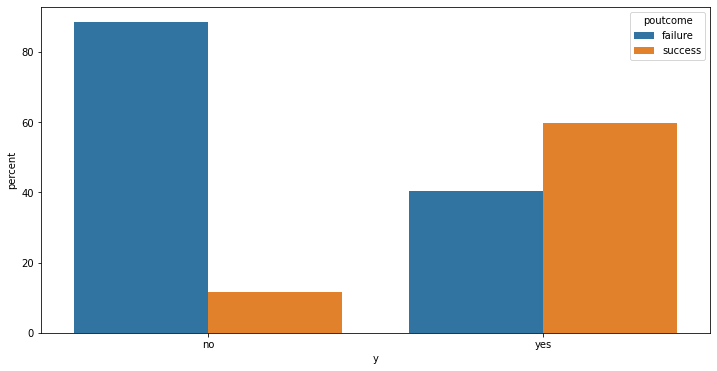

In [ ]:
#Si graficamos porcentajes lo vemos aún mas claro, no hay un patrón claro en Yes o en No
x,y = 'y','poutcome'

df1 = df[df.poutcome != 'nonexistent'].groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

**Lo que se observa del gráfico anterior es que dentro de los casos de éxito de la campaña actual, hay mayor proporción de clientes que ya habían contrato el PF previamente. Lo contrario ocurre en los que no contrataron ningún PF ahora: En las campañas anteriores tampoco lo hicieron.**

**Otro aspecto a analizar es la proporción de fracasos en campañas anteriores, que en esta oportunidad fueron un èxito. De cierta manera permite medir la efectividad esta campaña para atraer clientes nuevos, que no habían contratado con anterioridad.**

#### ¿Es la edad un factor significativo?

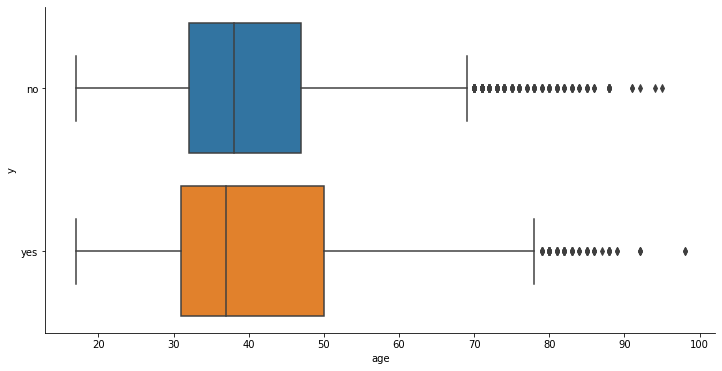

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="age", y='y')
sns.despine()

In [ ]:
#Probabilidad de contratar el PF dado el grupo etario
pd.crosstab(df.age_group,df.y,margins=True,normalize="index")

y,no,yes
age_group,,
"(15, 25]",0.790516,0.209484
"(25, 35]",0.882805,0.117195
"(35, 45]",0.914902,0.085098
"(45, 55]",0.913080,0.086920
"(55, 65]",0.847789,0.152211
"(65, 98]",0.531502,0.468498
All,0.887346,0.112654


**La probabilidad de contratar un PF depende del rango etario del cliente. La mayor probabilidad de contratación se da en los extremos: entre las personas mayores de 65 años (p=0.47), luego los que tienen entre 15 y 25 años (p=0.21).
A su vez, la probabilidad se reduce hacia el centro de la distribución de edades, alcanzando su menor valor entre aquellas personas que tienen entre 35 y 45 años (p=0.085).**

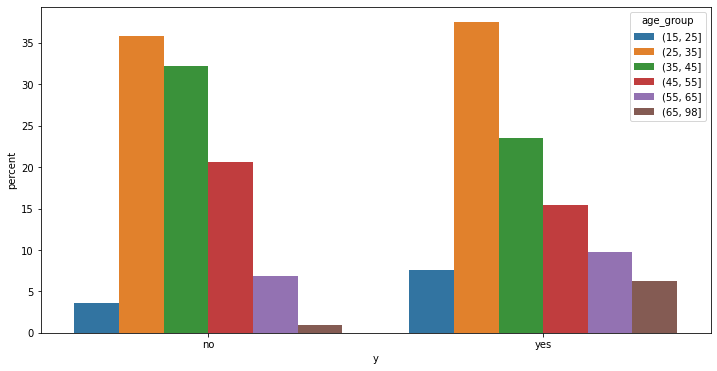

In [ ]:
#Si graficamos porcentajes, se ve que dentro del grupo 'yes' hay una prepondeancia delrango 25-35
x,y = 'y','age_group'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

#### ¿Es el nivel de estudios un factor significativo?

In [ ]:
#Probabilidad de contratar el PF dado el grupo etario
pd.crosstab(df.education_groups,df.y,margins=True,normalize="index")

y,no,yes
education_groups,,
Basic or less,0.912776,0.087224
High School,0.891645,0.108355
Professional,0.886515,0.113485
University,0.862755,0.137245
Unknown,0.854997,0.145003
All,0.887346,0.112654


**En general, mientras mayor sea el nivel de estudios, mayor será la probabilidad de que contraten el PF. No obstante, quedan algunas probabilidades altas extrañas para los grupos de personas que no declaran info de nivel de educación, las cuales pueden verse influenciadas por el hecho de contemplar distintos niveles de educación dentro del grupo (nivel educativo desconocido).**

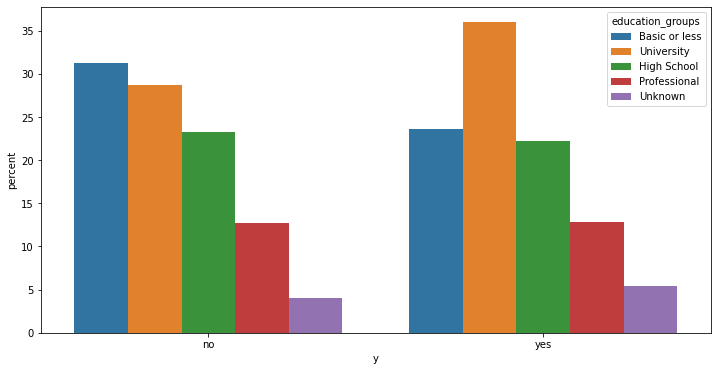

In [ ]:
#Si graficamos porcentajes, se ve que dentro del grupo 'yes' hay una prepondeancia de University
x,y = 'y','education_groups'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

No se encuentran mayores diferencias respecto al grupo total de los casos exitosos

#### ¿Es significativa la cantidad de veces que ha sido contactado el cliente en la actual campaña?

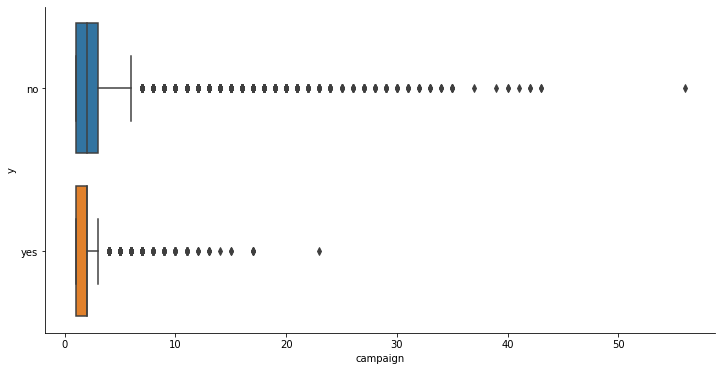

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="campaign", y='y')
sns.despine()

A partir de este gráfico se ve claro que para los casos con resultado negativo, hubo mayor número de contactos en esta campaña

In [ ]:
df['campaign_group'] = to_categorical(df.campaign,bin_size=2, min_cut=1, max_cut=9)


In [ ]:
pd.crosstab(df.campaign_group,df.y,margins=True,normalize="index")

y,no,yes
campaign_group,,
"(1, 3]",0.887813,0.112187
"(3, 5]",0.913176,0.086824
"(5, 7]",0.929726,0.070274
"(7, 9]",0.950220,0.049780
"(9, 56]",0.964351,0.035649
All,0.900620,0.099380


**La probabilidad de contratar PF es menor a medida que se incrementa la cantidad de veces que fue llamada por teléfono la persona.Se advierte que las personas que contrataron el PF se encuentran entre aquellas que recibieron una menor cantidad de llamados. Podemos analizar las probabilidades de que se contrate el PF en función de la cantidad de veces que fueron contactados.**

In [ ]:
#Analizamos cómo se comporta el grupo que sí contrató
max = 3

df_no_0_campaign = df_no[df_no.campaign.between(1,max)]
df_yes_0_campaign = df_yes[df_yes.campaign.between(1,max)]
df_no_1_campaign = df_no[df_no.campaign > max]
df_yes_1_campaign = df_yes[df_yes.campaign > max]

In [ ]:
porc_pocas_llamadas = (len(df_yes_0_campaign) / len (df_yes))*100
porc_muchas_llamdas = (len(df_yes_1_campaign) / len (df_yes))*100

print(porc_pocas_llamadas)
print(porc_muchas_llamdas)

88.03879310344827
11.961206896551724


**El 88% de los clientes que contrataron el servicio fue contactado hasta 3 veces en la campaña actual. Veamos como se distribuyen porcentualmente la cantidad de contactos previos según Yes/No**

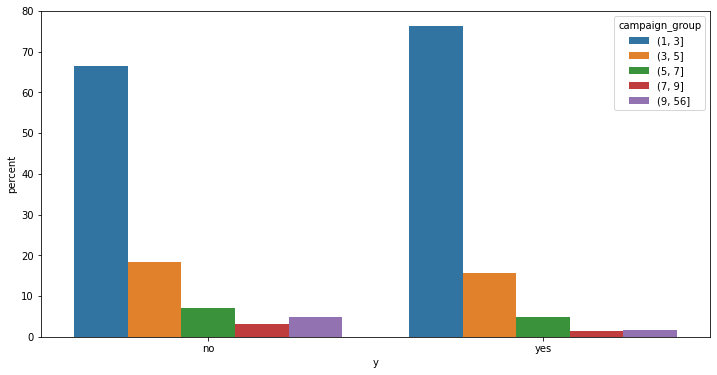

In [ ]:
#Si graficamos porcentajes:
x,y = 'y','campaign_group'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

#### ¿Es significativa la duración de las llamadas? ¿Varía en función de si el cliente fue contactado por primera vez en esta campaña (previous = 0)?

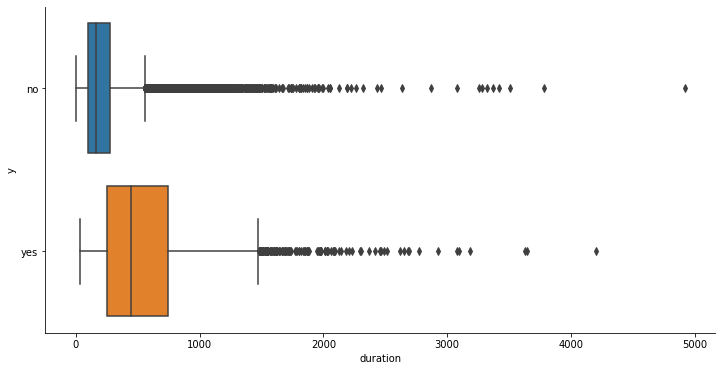

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="duration", y='y')
sns.despine() #Las respuestas negativas al PF estuvieron más concentradas en aquellas llamadas de menor duración.

Agrupamos la variable duration

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df['duration_group'] = to_categorical(df.duration, bin_size = 180, min_cut = 0, max_cut = 2160)
df_yes = df[df.y=='yes']
df_no = df[df.y=='no']

#Agrupamos la duración de las llamadas cada 3 minutos (esto podría cambiar)
# df_yes['duration_group'] = to_categorical(df_yes.duration, bin_size = 180, min_cut = 0, max_cut = 2160)
# df_no['duration_group'] = to_categorical(df_no.duration, bin_size = 180, min_cut = 0, max_cut = 2160)



Dividimos al grupo además en función de si fue contactado por primera vez, o si ya habia sido contactado antes

In [ ]:
# Analizar la duración de las llamadas sobre el grupo mayoritario (sin llamads previas), sobre los que tuvieron
# llamadas previas, y sobre todo el grupo (con y sin llamadas previas)


df_no_0 = df_no[df_no['previous']==0]
df_yes_0 = df_yes[df_yes['previous']==0]
df_no_1 = df_no[df_no['previous']!=0]
df_yes_1 = df_yes[df_yes['previous']!=0]


In [ ]:
porc_0_llamadas_previas = (len(df_yes_0) / len (df_yes))*100
porc_con_llamadas_previas = (len(df_yes_1) / len (df_yes))*100

print(porc_0_llamadas_previas)
print(porc_con_llamadas_previas)

67.69396551724138
32.30603448275862


**De los clientes que contrataron el servicio en la campaña actual, 67% habia sido llamado por primera vez en esta campaña (no fue contactado en campañas anteriores). Graficamos primero la distribución porcental de la duración de las llamadas entre Yes/No, y luego nos concentramos en este 67%**

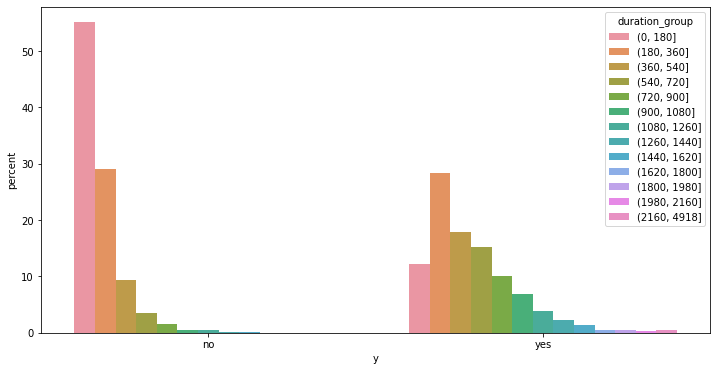

In [ ]:
#Si graficamos porcentajes:
x,y = 'y','duration_group'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

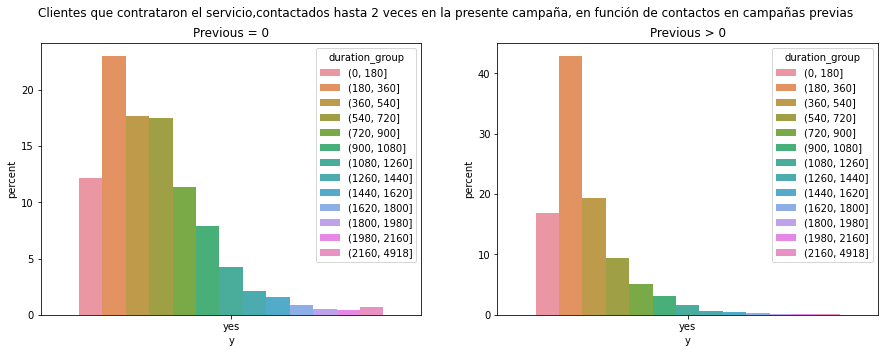

In [ ]:
x,y = 'y','duration_group'

plt.figure(figsize=(15,5))
plt.suptitle("Clientes que contrataron el servicio,contactados hasta 2 veces en la presente campaña, en función de contactos en campañas previas")
plt.subplot(1,2,1)
plt.title('Previous = 0')
df1 = df_yes_0_campaign[df_yes_0_campaign.previous==0].groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sns.barplot(x=x,y='percent',hue=y,data=df1)

plt.subplot(1,2,2)
plt.title('Previous > 0')
df1 = df_yes_0_campaign[df_yes_0_campaign.previous!=0].groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

Cuando un cliente fue contactado previamente (previous > 0), la contratación parece concretarse más rápido (hay un pico en las llamadas de 3 a 6 minutos)


### Análisis de relación entre la situación crediticia y la aceptación del PF

In [ ]:
pd.crosstab(df.default, df.y, margins=True,normalize=False)   
#hay muy pocos que tienen crédito en default (solo 3), se puede deber a una decisión respecto de a quién llamar

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


**No fueron contactadas como objetivo de la campaña aquellos clientes que tienen créditos en default.**

In [ ]:
pd.crosstab(df.housing, df.y, margins=True,normalize=False) 

y,no,yes,All
housing,,,
no,16596,2026,18622
unknown,883,107,990
yes,19069,2507,21576
All,36548,4640,41188


In [ ]:
pd.crosstab(df.housing, df.y, margins=True,normalize="index")    
#la probabilidad de contratar PF es levemente mayor para aquellos que tienen un crédito hipotecario

y,no,yes
housing,,
no,0.891204,0.108796
unknown,0.891919,0.108081
yes,0.883806,0.116194
All,0.887346,0.112654


In [ ]:
pd.crosstab(df.loan, df.y, margins=True,normalize=False) 

y,no,yes,All
loan,,,
no,30100,3850,33950
unknown,883,107,990
yes,5565,683,6248
All,36548,4640,41188


In [ ]:
pd.crosstab(df.loan, df.y, margins=True,normalize="index")    
#la probabilidad de contratar PF es levemente mayor para aquellos que no tienen un crédito personal

y,no,yes
loan,,
no,0.886598,0.113402
unknown,0.891919,0.108081
yes,0.890685,0.109315
All,0.887346,0.112654


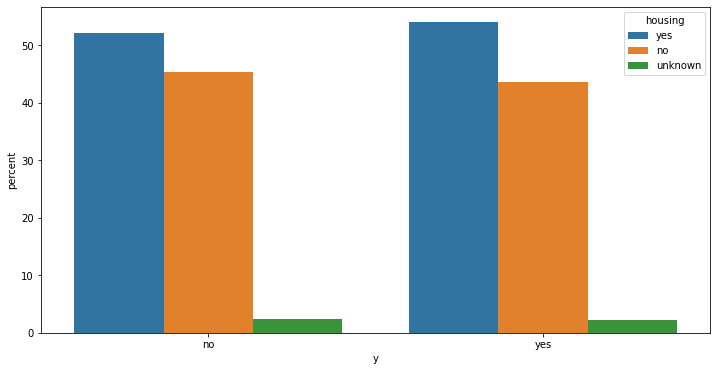

In [ ]:
#Si graficamos porcentajes no hay un patrón claro en Yes o en No
x,y = 'y','housing'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

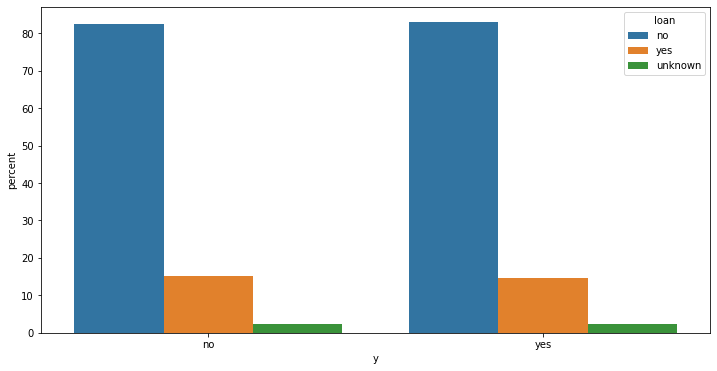

In [ ]:
#Si graficamos porcentajes lo vemos aún mas claro, no hay un patrón claro en Yes o en No
x,y = 'y','loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

**No se ve una diferencia clara en la situación crediticia, entre quienes contrataron el servicio y quienes no lo contrataron.**

### ¿Influye el medio de comunicaición ?

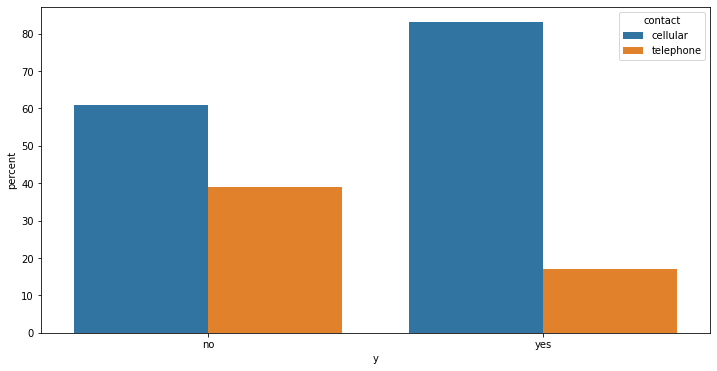

In [ ]:
#Si graficamos porcentajes lo vemos aún mas claro, no hay un patrón claro en Yes o en No
x,y = 'y','contact'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

**El gráfico anterior es interesante, se ve una mayor proporción de contacto por celular en los casos exitosos, que en los casos no exitosos.**

##Análisis de las variables de contexto

Análisis de las correlaciones entre las variables de contexto y la contratación del PF

In [ ]:
correlation_mat = df[['y_','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()
correlation_mat

,y_,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y_,1.000000,-0.298334,-0.136211,0.054878,-0.307771,-0.354678
emp.var.rate,-0.298334,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,-0.136211,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.054878,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,-0.307771,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.354678,0.906970,0.522034,0.100513,0.945154,1.000000


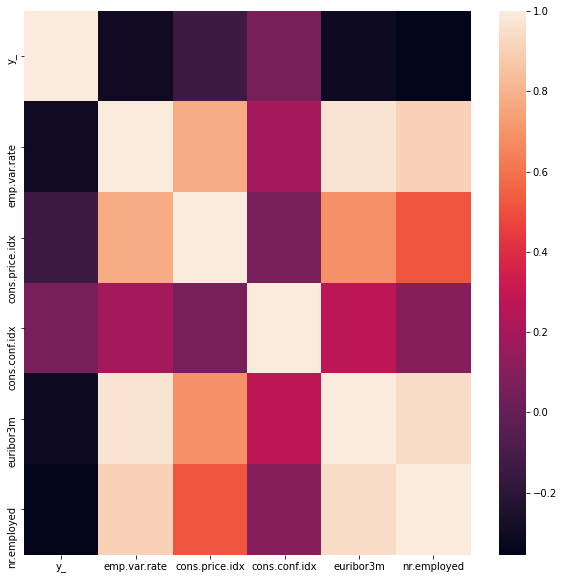

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(correlation_mat, annot = False) 
plt.show()

#### Tasa de interés de referencia

In [ ]:
Hacemos primero un agrupamiento

In [ ]:
df['euribor3m_group']=to_categorical(df.euribor3m, bin_size=3, min_cut=0.5, max_cut=6)

In [ ]:
pd.crosstab(df.euribor3m_group,df.y, margins=True,normalize="index") 

y,no,yes
euribor3m_group,,
"(0.5, 3.5]",0.755462,0.244538
"(3.5, 6.5]",0.951671,0.048329
All,0.887346,0.112654


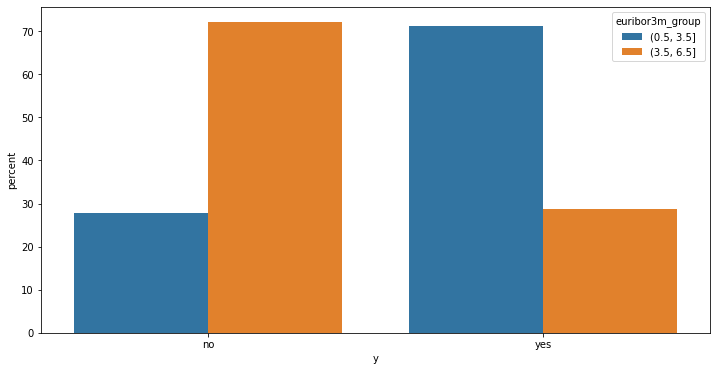

In [ ]:
#Si graficamos porcentajes
x,y = 'y','euribor3m_group'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()


**Para apoyar el gráfico anterior, sería interesante contar con el dato de la tasa que efectivamente se ofreció al cliente por este PF. Si bien euribor es el valor de referencia que usan los bancos, nos falta esa información.**

#### Cons.conf.idx

Hacemos primero una agrupación

In [ ]:
df['conf_group']=to_categorical(df['cons.conf.idx'], bin_size=5, min_cut=-40, max_cut=-25)

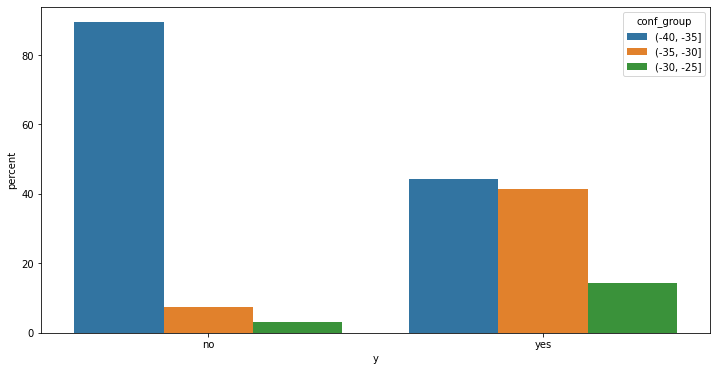

In [ ]:
#Si graficamos porcentajes
x,y = 'y','conf_group'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

**Se observa que cuando el índice de confianza del consumidor es muy bajo, es más probable que no se contrate el PF**

#### no.employed

In [ ]:
df['employed_group']=to_categorical(df['nr.employed'], bin_size=100, min_cut=4950, max_cut=5250)

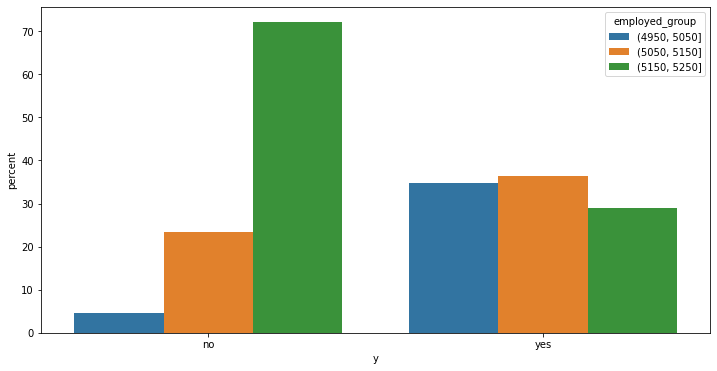

In [ ]:
#Si graficamos porcentajes
x,y = 'y','employed_group'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=x,y='percent',hue=y,data=df1)
plt.show()

**Se observa que cuando es mayor el nivel de empleo, es más probable que no se contrate un PF. Resta analizar las causas de este comportamiento.**